In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
listings = pd.read_csv('data/listings.csv')
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,13913,Holiday London DB Room Let-on going,54730,Alina,NaN,Islington,51.56802,-0.11121,Private room,40,1,21,2020-02-22,0.16,2,365
1,15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,NaN,Kensington and Chelsea,51.48796,-0.16898,Entire home/apt,75,10,89,2020-03-16,0.66,1,189
2,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,NaN,Westminster,51.52195,-0.14094,Entire home/apt,307,4,42,2019-11-02,0.35,15,270
3,17506,Boutique Chelsea/Fulham Double bed 5-star ensuite,67915,Charlotte,NaN,Hammersmith and Fulham,51.47935,-0.19743,Private room,150,3,0,NaN,NaN,2,364
4,25123,Clean big Room in London (Room 1),103583,Grace,NaN,Barnet,51.57224,-0.20906,Private room,29,10,129,2020-03-15,0.98,3,43


In [3]:
listings_zip = pd.read_csv('data/zipped/listings.csv')
print(listings_zip.head())
print(listings_zip.shape)

      id                         listing_url       scrape_id last_scraped  \
0  13913  https://www.airbnb.com/rooms/13913  20210209201301   2021-02-12   
1  15400  https://www.airbnb.com/rooms/15400  20210209201301   2021-02-12   
2  17402  https://www.airbnb.com/rooms/17402  20210209201301   2021-02-12   
3  17506  https://www.airbnb.com/rooms/17506  20210209201301   2021-02-12   
4  25123  https://www.airbnb.com/rooms/25123  20210209201301   2021-02-13   

                                                name  \
0                Holiday London DB Room Let-on going   
1                Bright Chelsea  Apartment. Chelsea!   
2              Superb 3-Bed/2 Bath & Wifi: Trendy W1   
3  Boutique Chelsea/Fulham Double bed 5-star ensuite   
4                  Clean big Room in London (Room 1)   

                                         description  \
0  My bright double bedroom with a large window h...   
1  Lots of windows and light.  St Luke's Gardens ...   
2  You'll have a wonderful stay 

There are two *listings.csv* files (listings.csv and listings.csv.gz). They contain information on appartment/arrangement details. Both of them have the same number of records 76534, but the latter has much more detailed info (more columns), so this one will be analysed.

In [23]:
listings_zip.groupby(['host_id', 'name'])['id'].count().reset_index()

,host_id,name,id
0,2010,Beautiful spacious Camden apartment,1
1,4775,"Bright, roomy, luxurious double, 2mins Old St ...",1
2,4775,Old St 3 bed flat Grd Flr Two mins from tube,1
3,4775,Old St Comfy Ground Floor Double with en suite,1
4,4775,"Old St. Simple, comfy double, 2 mins from tube",1
...,...,...,...
75725,387320113,Exec Apartment in Central location,1
75726,387388284,"Private, stylish 1 bedroom flat near Heathrow",1
75727,387407620,Luxury Rooms in Shadwell,1
75728,387584026,Urban peace at the heart of Croydon,1


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

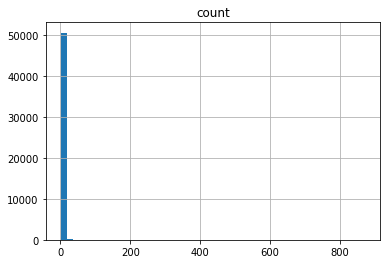

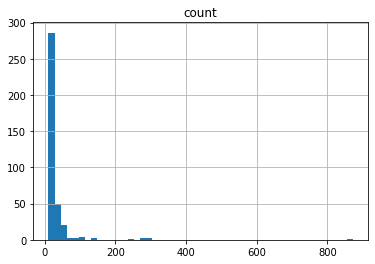

In [32]:
host_info = listings_zip.groupby('host_id')['id'].count().reset_index()
host_info.columns = ['host_id', 'count']
host_info.hist(column='count', bins=50)
host_info[host_info['count'] > 10].hist(column='count', bins=50)

From **host_info** histograms we can see that one provider may have multiple arrangements, but most of them (more than 90%) have just a few (0-10). This means that there are a lot of small accomodations

In [38]:
host_loc = listings_zip['host_location'].value_counts().reset_index()
host_loc.head(50)

,index,host_location
0,"London, England, United Kingdom",32700
1,GB,10101
2,"England, United Kingdom",10016
3,"London, United Kingdom",6336
4,London,5023
5,United Kingdom,592
6,"London, UK",544
7,"Greater London, England, United Kingdom",448
8,london,269
9,london,251


In [45]:
listings_zip['host_response_time'].value_counts(dropna=False)

NaN                   43221
within an hour        17059
within a few hours     6751
within a day           6141
a few days or more     3362
Name: host_response_time, dtype: int64

In [50]:
listings_zip['host_is_superhost'].value_counts(dropna=False)

f      65779
t      10709
NaN       46
Name: host_is_superhost, dtype: int64

Columns that describe host: *(categorical):* **host_response_time, host_is_superhost**, *(numerical):* **host_response_rate, host_acceptance_rate, host_listings_count, host_total_listings_count**

In [52]:
listings_zip['host_identity_verified'].value_counts(dropna=False)

t      58647
f      17841
NaN       46
Name: host_identity_verified, dtype: int64

There are a lot more identities verified, this might be important feature **host_indentity_verified** in customer decision whether to engage with the host.

In [54]:
# Location information
listings_zip['neighbourhood_cleansed'].value_counts()

Westminster               8507
Tower Hamlets             6891
Hackney                   5709
Kensington and Chelsea    5285
Camden                    5179
Islington                 4501
Lambeth                   4324
Southwark                 4263
Wandsworth                3885
Hammersmith and Fulham    3497
Brent                     2357
Haringey                  2168
Lewisham                  2147
Newham                    1842
Ealing                    1696
Barnet                    1638
Greenwich                 1558
Waltham Forest            1367
Merton                    1234
Croydon                   1139
Richmond upon Thames      1105
Hounslow                  1020
Redbridge                  690
Enfield                    663
Hillingdon                 623
Bromley                    600
Kingston upon Thames       515
Harrow                     448
City of London             441
Barking and Dagenham       402
Sutton                     308
Bexley                     276
Havering

Location information contained in columns: **neighbourhood, neighbourhood_cleansed, latitude, longitude** could be used to match customer wanted destination with closest appartments.

In [63]:
listings_zip['property_type'].value_counts(dropna=False)

Entire apartment                 31714
Private room in apartment        18038
Private room in house            11092
Entire house                      5516
Private room in townhouse         1521
                                 ...  
Private room in parking space        1
Shared room in tent                  1
Private room in tent                 1
Lighthouse                           1
Yurt                                 1
Name: property_type, Length: 93, dtype: int64

In [58]:
listings_zip['room_type'].value_counts(dropna=False)

Entire home/apt    41633
Private room       33734
Shared room          608
Hotel room           559
Name: room_type, dtype: int64

Features that describe room and property type are of quite importance also. **room_type, property_type**

In [94]:
listings_zip.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.653400e+04,7.653400e+04,7.653400e+04,76488.000000,76488.000000,0.0,76534.000000,76534.000000,76534.000000,0.0,71696.000000,75315.000000,76534.000000,7.653400e+04,76531.000000,76531.000000,7.653100e+04,7.653100e+04,76531.000000,7.653100e+04,0.0,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000,76534.000000,52597.000000,52535.000000,52544.000000,52488.000000,52537.000000,52489.000000,52488.00000,0.0,76534.000000,76534.000000,76534.000000,76534.000000,54340.000000
mean,2.608547e+07,2.021021e+13,9.737649e+07,24.551982,24.551982,NaN,51.510066,-0.128113,3.041237,NaN,1.482454,1.699130,5.308582,2.085164e+04,5.649854,6.700788,2.734925e+05,9.188875e+05,6.142355,8.661266e+05,NaN,11.410014,24.316343,37.690517,118.742154,15.207437,1.081245,0.042478,93.080328,9.527268,9.284124,9.650720,9.670632,9.558365,9.30285,NaN,20.896621,17.543693,2.801043,0.037395,0.571656
std,1.353230e+07,0.000000e+00,1.026857e+08,134.118472,134.118472,NaN,0.047620,0.094883,1.938889,NaN,0.887224,1.287209,23.053843,4.082597e+06,24.260410,30.576637,2.364175e+07,4.409240e+07,26.695042,4.175313e+07,NaN,13.601386,27.492859,41.368523,143.842762,35.431784,3.744462,0.315806,10.551691,1.036130,1.188537,0.933248,0.931965,0.870299,1.08223,NaN,99.725744,96.391546,17.238188,0.512463,0.818797
min,1.391300e+04,2.021021e+13,2.010000e+03,0.000000,0.000000,NaN,51.297330,-0.510220,0.000000,NaN,1.000000,0.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.526331e+07,2.021021e+13,1.636504e+07,1.000000,1.000000,NaN,51.484460,-0.188308,2.000000,NaN,1.000000,1.000000,1.000000,3.100000e+01,1.000000,1.000000,9.000000e+01,9.000000e+01,1.000000,9.000000e+01,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.100000
50%,2.624784e+07,2.021021e+13,5.012855e+07,1.000000,1.000000,NaN,51.514250,-0.125730,2.000000,NaN,1.000000,1.000000,2.000000,1.125000e+03,2.000000,2.000000,1.125000e+03,1.125000e+03,2.000000,1.125000e+03,NaN,0.000000,0.000000,1.000000,42.000000,3.000000,0.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,1.000000,1.000000,1.000000,0.000000,0.290000
75%,3.833904e+07,2.021021e+13,1.567602e+08,3.000000,3.000000,NaN,51.539520,-0.069172,4.000000,NaN,2.000000,2.000000,4.000000,1.125000e+03,4.000000,4.000000,1.125000e+03,1.125000e+03,4.000000,1.125000e+03,NaN,29.000000,59.000000,88.000000,252.000000,14.000000,1.000000,0.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,NaN,4.000000,1.000000,1.000000,0.000000,0.730000
max,4.810299e+07,2.021021e+13,3.876413e+08,7235.000000,7235.000000,NaN,51.679980,0.288570,16.000000,NaN,50.000000,50.000000,1125.000000,1.000000e+09,1125.000000,1125.000000,2.147484e+09,2.147484e+09,1125.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,821.000000,446.000000,19.000000,100.000000,10.000000,10.000000,1

These columns are numeric numeric and they all could be used as features for the arrangement(accomodation) except **license, scrape_id, id, host_id, **

In [118]:
listings_zip.price.astype(str).apply(lambda x: x[1:].replace(',', '')).astype(float).describe()

count    76534.000000
mean       113.899051
std        313.830681
min          0.000000
25%         42.000000
50%         75.000000
75%        120.000000
max      17746.000000
Name: price, dtype: float64

**price** is one of the most important features, and from these statistics it could be seen that it is evenly distributed across different amounts. 

In [8]:
reviews = pd.read_csv('data/reviews.csv')
print(reviews.head())
print(reviews.shape)

   listing_id        date
0       13913  2010-08-18
1       13913  2011-07-11
2       13913  2011-09-13
3       13913  2011-10-03
4       13913  2011-10-09
(1163886, 2)


In [9]:
reviews_zip = pd.read_csv('data/zipped/reviews.csv')
print(reviews_zip.head())
print(reviews_zip.shape)

   listing_id      id        date  reviewer_id reviewer_name  \
0       13913   80770  2010-08-18       177109       Michael   
1       13913  367568  2011-07-11     19835707       Mathias   
2       13913  529579  2011-09-13      1110304       Kristin   
3       13913  595481  2011-10-03      1216358       Camilla   
4       13913  612947  2011-10-09       490840         Jorik   

                                            comments  
0  My girlfriend and I hadn't known Alina before ...  
1  Alina was a really good host. The flat is clea...  
2  Alina is an amazing host. She made me feel rig...  
3  Alina's place is so nice, the room is big and ...  
4  Nice location in Islington area, good for shor...  
(1163886, 6)


There are two tables ***reviews.csv*** and ***reviews.zip.gz*** that contain information which customer engaged with which listing (arrangement). The latter contain much detailed information so this one will be further analyzed.

One customer with review on specific accomodation (listing_id) at particular time (date) define one review_arrangement pair. 

In [72]:
reviewers = reviews_zip['reviewer_id'].value_counts().reset_index()

array([[<AxesSubplot:title={'center':'reviewer_id'}>]], dtype=object)

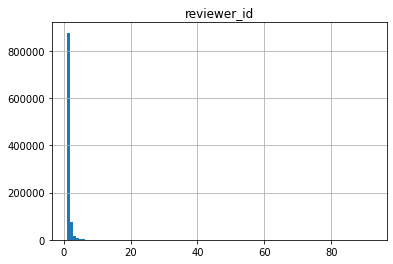

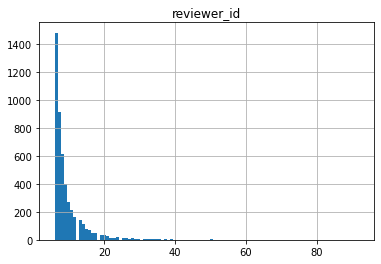

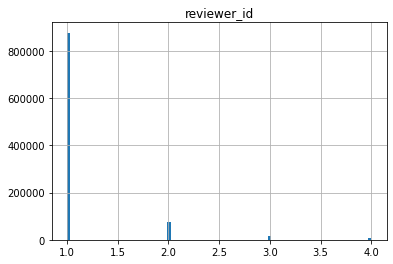

In [119]:
reviewers.hist(column='reviewer_id', bins=100)
reviewers[reviewers['reviewer_id'] > 5].hist(column='reviewer_id', bins=100)
reviewers[reviewers['reviewer_id'] < 5].hist(column='reviewer_id', bins=100)

From histogram we see that most of the reviewers had small (1, 2) numbers of interactions with arrangements (listings). This is important in deciding which type of recommendation engine to use based on user-item (reviewer-listing) sparsity. Based on this and on the type of the data, context based recommenders seem like natural choice.

array([[<AxesSubplot:title={'center':'comments'}>]], dtype=object)

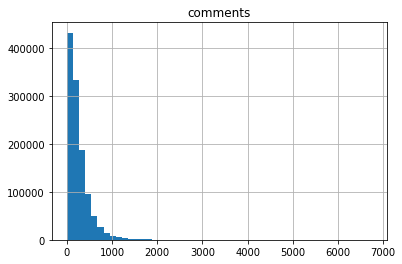

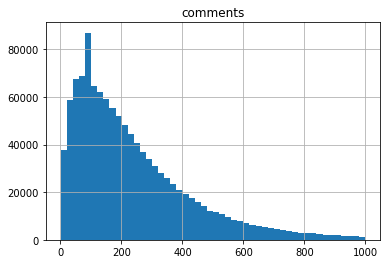

In [93]:
comments_len_info = reviews_zip['comments'].astype(str).apply(lambda x: len(x)).reset_index()
comments_len_info.hist(column='comments', bins=50)
comments_len_info[comments_len_info['comments'] < 1000].hist(column='comments', bins=50)

The length of the comments may vary and this means the comments may be various, so some text processing on them might give some important features (sentiment, satisfaction, ...)

Based on these interactions between reviewers and listings, reviewers could be presented as aggregated data over these. For example features such as: number of reviews, average price, distribution over room_type, prefered locations etc.

In [10]:
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
print(neighbourhoods.head())
print(neighbourhoods.shape)

   neighbourhood_group         neighbourhood
0                  NaN  Barking and Dagenham
1                  NaN                Barnet
2                  NaN                Bexley
3                  NaN                 Brent
4                  NaN               Bromley
(33, 2)


Neighbourhood information is already contained in the listings columns, so there is no need for this table. 

In [11]:
calendar = pd.read_csv('data/zipped/calendar.csv')
print(calendar.head())
print(calendar.shape)

   listing_id        date available   price adjusted_price  minimum_nights  \
0      100326  2021-02-13         f  $33.00         $33.00             2.0   
1       13913  2021-02-12         t  $40.00         $40.00             1.0   
2       13913  2021-02-13         t  $40.00         $40.00             1.0   
3       13913  2021-02-14         t  $40.00         $40.00             1.0   
4       13913  2021-02-15         t  $40.00         $40.00             1.0   

   maximum_nights  
0            10.0  
1            29.0  
2            29.0  
3            29.0  
4            29.0  
(27935194, 7)


In [15]:
calendar[calendar['listing_id'] == 22733521]

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
11951657,22733521,2021-02-12,t,$140.00,$140.00,5.0,1125.0
11951963,22733521,2021-02-13,t,$140.00,$140.00,5.0,1125.0
11951964,22733521,2021-02-14,t,$140.00,$140.00,5.0,1125.0
11951965,22733521,2021-02-15,t,$140.00,$140.00,5.0,1125.0
11951966,22733521,2021-02-16,t,$140.00,$140.00,5.0,1125.0
...,...,...,...,...,...,...,...
11953090,22733521,2022-02-01,f,$140.00,$140.00,7.0,1125.0
11953091,22733521,2022-02-02,f,$140.00,$140.00,7.0,1125.0
11953092,22733521,2022-02-03,f,$140.00,$140.00,7.0,1125.0
11953093,22733521,2022-02-04,f,$140.00,$140.00,7.0,1125.0


In [14]:
calendar['listing_id'].value_counts()

47823752    367
4453694     367
6533477     367
409444      367
3733480     367
           ... 
46730450    365
14836659    365
22733521    359
36445850     15
1298770      13
Name: listing_id, Length: 76531, dtype: int64

From calendar table it is noticed that each of the listing has given its full availability times across the year, and this is definitely used when matching wanted period of the year from customer side to available accomodations at that time.

**Business value proposition**: Based on data that is given where listings represent items and reviews represent interactions between users (reviewers) and items, considering features that could be extracted to fully define an item and user, there is a strong potential for context based recommender where unique combination of user preferences and previous behaviour will be matched with the most suitable arrangement.

This could significantly improve user search for appropriate accomodation (and therefore user experience), increase conversion rates, suggest similar accomodations that the user hasn't seen before etc. 